In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import util
import collections
%matplotlib inline

In [2]:
folder_path = "../data/MonthwiseData/"
weeks = {}
normWeeks = {}
cumWeeks = {}
for i in range(2010, 2015, 2):
    vals = util.read_2D_values(folder_path + str(i) + ".csv")
    vals = vals[1:]
    for j in range(0, len(vals)):
        if i not in  weeks.keys():
            weeks[i] = {}
            normWeeks[i] = {}
            cumWeeks[i] = {}
        cumWeeks[i][vals[j][0]] = vals[j][1]
        weeks[i][vals[j][0]] = vals[j][1]
        normWeeks[i][vals[j][0]] = vals[j][1]

for year in weeks:
    temp = []
    normTemp = []
    sumOfYr = 0
    for i in range(1, 54):
        if str(i) in weeks[year].keys():
            temp.append( int(weeks[year][str(i)]) )
            sumOfYr+=int(weeks[year][str(i)])
        else:
            temp.append( 0 )
    for i in range(0,53):
        normTemp.append(temp[i]/sumOfYr)
    weeks[year] = temp
    normWeeks[year] = normTemp

# print( weeks )
# print(normWeeks)

In [3]:
for yr in cumWeeks:
#     print(weeks[yr])
    cumTemp = [normWeeks[yr][0]]    
    sumOfYr = 0
    for i in range(1, 53):
        cumTemp.append(cumTemp[i-1]+normWeeks[yr][i])
#         print(cumTemp)
        sumOfYr+=normWeeks[yr][i]
    print(sumOfYr)
    for i in range(0,53):
        cumTemp[i] = cumTemp[i]/sumOfYr
    cumWeeks[yr] = cumTemp


0.997072513750303
0.9854009420651185
0.9928794184121879


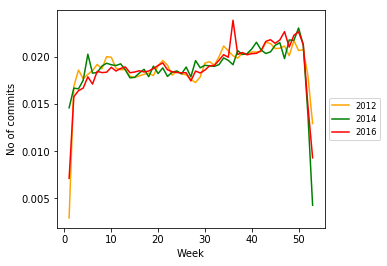

In [6]:
X_range = np.array( range(1, 54) )
plots = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'black', 'pink', 'olive', 'cyan']
counter = 1
for year in weeks:
    normWeeks[year] = np.array( normWeeks[year] ).astype(np.float)
    plots.append( util.getYPlotObj(normWeeks[year], "line", label=year+2, color=colors[counter%len(colors)]) )
    counter += 1
    
#         plots.append( util.getYPlotObj(langs[lang], "line", color=colors[counter%len(colors)]) )
util.plot_graph(X_range, plots, X_label="Week", Y_label="No of commits",showLegend=True);

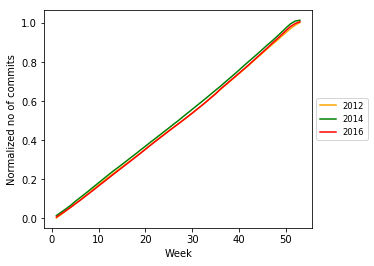

In [7]:
X_range = np.array( range(1, 54) )
plots = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'black', 'pink', 'olive', 'cyan']
counter = 1
for year in cumWeeks:
    cumWeeks[year] = np.array( cumWeeks[year] ).astype(np.float)
    plots.append( util.getYPlotObj(cumWeeks[year], "line", label=year+2, color=colors[counter%len(colors)]) )
    counter += 1
    
#         plots.append( util.getYPlotObj(langs[lang], "line", color=colors[counter%len(colors)]) )
util.plot_graph(X_range, plots, X_label="Week", Y_label="Normalized no of commits", showLegend=True);

In [7]:
def permutation_test(x1, x2, noOfPerms = 100000):
#     print(x1)
#     print(x2)
    len1 = len(x1)
    len2 = len(x2)
#     print(len1)
#     print(len2)
    l = x1 + x2
#     print(len(l))
    mean1 = np.mean(x1)
#     print(mean1)
    
    mean2 = np.mean(x2)
#     print(mean2)
    delta = abs(mean1-mean2)
    # random.shuffle(l)
    t_obs = abs(delta)
#     print("t_obs = ")
#     print(t_obs)
    t = []
    for i in range(0,noOfPerms):
        perm = np.random.permutation(l)
#         print('len of perm',len(perm))
        x1 = perm[0:len1]
#         print(len(x1))
#         print(x1)
        x2 = perm[len1:len1+len2]
#         print(x2)
#         print(x1)
#         print(x2)
        mean1 = np.mean(x1)
        mean2 = np.mean(x2)
#         print(mean1)
#         print(mean2)
        t.append(abs(mean1-mean2))
#     print(t)


#     print(t[0:10])
    count = 0
    for t_i in t:
        if(t_i>t_obs):
            count = count + 1
    print("count =")
    print(count)
    p_value = float(count)/len(t)
    print("p-value from permutation test")
    print(p_value)
    return p_value

In [8]:
#Permutation test
years = list(weeks.keys())
print ("years= ",years)
p_values = []

for year in range(len(years)-1):
    print ("current year= ",year)
    p_values.append(util.permutation_test(weeks[years[year]], weeks[years[year+1]], 0.5))

print("p_values= ",p_values)
    

years=  [2010, 2012, 2014]
current year=  0

==== Permutation Test ====
t_obs  = 90759.3773585
se     = 4841.571470747931
w      = 18.7458509922
p      = 0.0
result = Failed

current year=  1

==== Permutation Test ====
t_obs  = 302277.075472
se     = 11234.303755501121
w      = 26.906614068
p      = 0.0
result = Failed

p_values=  [False, False]


In [21]:
#KS test
years = list(normWeeks.keys())
print('years', years)
for year in range(len(years)-1):
    diff = []
    for i in range(0,53):
#         print(normWeeks[years[year]][i], normWeeks[years[year+1]][i])
        diff.append(abs(normWeeks[years[year]][i] - normWeeks[years[year+1]][i]))
    maxm = max(diff)
    print(maxm)

years [2010, 2012, 2014]
0.00866242269978
0.00747847634707


In [ ]:
# seasonal time series analysis
